<a href="https://colab.research.google.com/github/dominikaandrzejewska/data_workshop1/blob/master/Day5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-23.csv')
#df1 = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-24.csv')
#pd.concat([df,df1])
df.head()

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
1,1,2018-07-23 06:00:47,612,Borsucza,22,Walcownia,2018-07-23 06:00:00,6.352185e+18,6351558574044899587,STOPPING,0,7.0
2,1,2018-07-23 06:00:48,572,Smolki,11,Czerwone Maki P+R,2018-07-23 06:00:00,6.352185e+18,6351558574044670211,STOPPING,0,10.0
3,1,2018-07-23 06:00:49,319,Jubilat,1,Wzgórza K.,2018-07-23 05:59:00,NaN,6351558574044363010,PLANNED,1,3.0
4,1,2018-07-23 06:00:49,322,Filharmonia,8,Bronowice Małe,2018-07-23 06:01:00,6.352185e+18,6351558574044592386,STOPPING,0,15.0


In [0]:
df[df.tripId == 6351558574044883205]

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
70,3,2018-07-23 06:01:42,379,Piasta Kołodzieja,21,Kopiec Wandy,2018-07-23 06:00:00,NaN,6351558574044883205,PLANNED,1,2.0
135,6,2018-07-23 06:02:46,382,Kleeberga,21,Kopiec Wandy,2018-07-23 06:01:00,NaN,6351558574044883205,PLANNED,1,3.0
284,12,2018-07-23 06:04:54,388,Dunikowskiego,21,Kopiec Wandy,2018-07-23 06:03:00,NaN,6351558574044883205,PLANNED,1,4.0
414,17,2018-07-23 06:06:40,2539,Rondo Hipokratesa,21,Kopiec Wandy,2018-07-23 06:05:00,NaN,6351558574044883205,PLANNED,1,5.0
493,20,2018-07-23 06:07:43,392,DH Wanda,21,Kopiec Wandy,2018-07-23 06:06:00,NaN,6351558574044883205,PLANNED,1,6.0
697,28,2018-07-23 06:10:39,2745,Rondo Kocmyrzowskie im. Ks. Gorzelanego,21,Kopiec Wandy,2018-07-23 06:09:00,NaN,6351558574044883205,PLANNED,1,7.0
772,31,2018-07-23 06:11:43,418,Os.Zgody,21,Kopiec Wandy,2018-07-23 06:10:00,NaN,6351558574044883205,PLANNED,1,8.0
1007,40,2018-07-23 06:14:58,2744,Plac Centralny im. R.Reagana,21,Kopiec Wandy,2018-07-23 06:13:00,NaN,6351558574044883205,PLANNED,1,9.0
1137,45,2018-07-23 06:16:49,423,Struga,21,Kopiec Wandy,2018-07-23 06:15:00,NaN,6351558574044883205,PLANNED,1,10.0


Delays in minutes

In [0]:
df.delay.value_counts(normalize=True)

0     0.426905
1     0.344715
2     0.123509
3     0.055987
4     0.025421
5     0.011410
6     0.004852
7     0.002657
8     0.001189
9     0.000867
10    0.000587
14    0.000503
12    0.000475
11    0.000350
13    0.000336
15    0.000154
16    0.000042
19    0.000028
18    0.000014
Name: delay, dtype: float64

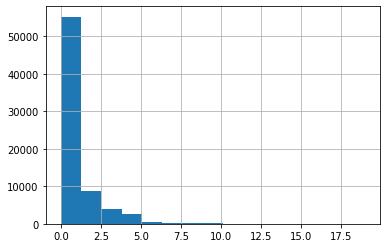

In [0]:
df.delay.hist(bins=15);

In [0]:
df.delay.describe()

count    71517.000000
mean         1.014039
std          1.357324
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         19.000000
Name: delay, dtype: float64

In [16]:
df.status.value_counts()

STOPPING     47224
PREDICTED    16997
PLANNED       7296
Name: status, dtype: int64

In [17]:
df.columns

Index(['index', 'time_stamp', 'stop', 'stopName', 'number', 'direction',
       'plannedTime', 'vehicleId', 'tripId', 'status', 'delay', 'seq_num'],
      dtype='object')

In [63]:
df['plannedTime'] = pd.to_datetime( df['plannedTime'])
df[['plannedTime']].info()

df['hour'] = df['plannedTime'].dt.hour

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71517 entries, 0 to 71516
Data columns (total 1 columns):
plannedTime    71517 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 558.9 KB


In [66]:
df['delay_secs'] = df['delay'].map(lambda x: x*60)
df['direction_cat'] = df['direction'].factorize()[0]
#Jeśli nie uzupełnię pustych wierszy w kolumnie VehicleId, wyskakuje błąd, a więc:
df['vehicleId'].fillna(-1, inplace=True)
df['seq_num'].fillna(-1, inplace=True)

def gen_id_num_direction(x):
  return ' {} {} '.format(x['number'], x['direction'])
df['number_direction_id'] = df.apply(gen_id_num_direction, axis=1).factorize()[0]

def gen_id_stop_direction(x):
  return ' {} {} '.format(x['stop'], x['direction'])
df['stop_direction_id'] = df.apply(gen_id_stop_direction, axis=1).factorize()[0]

feats = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num',
    'number_direction_id',
    'stop_direction_id',
]
X = df[feats].values
y = df['delay_secs'].values

#model = RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=8)
model = DecisionTreeRegressor(max_depth=10, random_state=0)
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-48.911446275525776, 2.5252312592564357)